
## Is Curitiba, on average, the coldest capital below the tropic of capricorn, of Brazil, during winter? ##


In [1]:
##Imports##

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import datetime as dt
import pandas as pd
import numpy as np
import re

curitiba = pd.read_csv('/home/isabela.almeida/Documents/applied-data-representation/project/weather-data/curitiba.csv', sep=';', header=9, index_col=False)
florianopolis = pd.read_csv('/home/isabela.almeida/Documents/applied-data-representation/project/weather-data/florianopolis.csv', sep=';', header=9, index_col=False)
portoalegre = pd.read_csv('/home/isabela.almeida/Documents/applied-data-representation/project/weather-data/portoalegre.csv', sep=';', header=9, index_col=False)
saopaulo = pd.read_csv('/home/isabela.almeida/Documents/applied-data-representation/project/weather-data/saopaulo.csv', sep=';', header=9, index_col=False)


In [2]:
##Creating an aux column##

curitiba['Data Medicao d-m'] = curitiba['Data Medicao']
florianopolis['Data Medicao d-m'] = florianopolis['Data Medicao'] 
portoalegre['Data Medicao d-m'] = portoalegre['Data Medicao'] 
saopaulo['Data Medicao d-m'] = saopaulo['Data Medicao'] 

curitiba['Data Medicao d'] = curitiba['Data Medicao'] 
florianopolis['Data Medicao d'] = florianopolis['Data Medicao'] 
portoalegre['Data Medicao d'] = portoalegre['Data Medicao'] 
saopaulo['Data Medicao d'] = saopaulo['Data Medicao'] 

curitiba['Data Medicao d-m'].replace(regex=r'\d{4}-', value='', inplace=True)
florianopolis['Data Medicao d-m'].replace(regex=r'\d{4}-', value='', inplace=True)
portoalegre['Data Medicao d-m'].replace(regex=r'\d{4}-', value='', inplace=True)
saopaulo['Data Medicao d-m'].replace(regex=r"\d{4}\-", value='', inplace=True)

curitiba['Data Medicao d'].replace(regex=r'\d{4}-\d{2}-', value='', inplace=True)
florianopolis['Data Medicao d'].replace(regex=r'\d{4}-\d{2}-', value='', inplace=True)
portoalegre['Data Medicao d'].replace(regex=r'\d{4}-\d{2}-', value='', inplace=True)
saopaulo['Data Medicao d'].replace(regex=r"\d{4}-\d{2}-", value='', inplace=True)

curitiba['Data Medicao d'] = curitiba['Data Medicao d'].astype(int)
florianopolis['Data Medicao d'] = florianopolis['Data Medicao d'].astype(int)
portoalegre['Data Medicao d'] = portoalegre['Data Medicao d'].astype(int)
saopaulo['Data Medicao d'] = saopaulo['Data Medicao d'].astype(int)

curitiba['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].replace(regex=',', value='.', inplace=True)
florianopolis['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].replace(regex=',', value='.', inplace=True)
portoalegre['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].replace(regex=',', value='.', inplace=True)
saopaulo['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].replace(regex=',', value='.', inplace=True)

curitiba['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'] = curitiba['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].astype(float)
florianopolis['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'] = florianopolis['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].astype(float)
portoalegre['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'] = portoalegre['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].astype(float)
saopaulo['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'] = saopaulo['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].astype(float)

curitiba = curitiba.groupby('Data Medicao d-m').mean()
florianopolis = florianopolis.groupby('Data Medicao d-m').mean()
portoalegre = portoalegre.groupby('Data Medicao d-m').mean()
saopaulo = saopaulo.groupby('Data Medicao d-m').mean()


In [3]:
## Obtaining only winter dates ##

curitiba.reset_index(inplace=True)
florianopolis.reset_index(inplace=True)
portoalegre.reset_index(inplace=True)
saopaulo.reset_index(inplace=True)

florianopolis = florianopolis[florianopolis['Data Medicao d-m'].str.contains(r"(0)[6789]\-")]
curitiba = curitiba[curitiba['Data Medicao d-m'].str.contains(r"(0)[6789]\-")]
saopaulo = saopaulo[saopaulo['Data Medicao d-m'].str.contains(r"(0)[6789]\-")]
portoalegre = portoalegre[portoalegre['Data Medicao d-m'].str.contains(r"(0)[6789]\-")]


curitiba.reset_index(inplace=True, drop=True)
florianopolis.reset_index(inplace=True, drop=True)
portoalegre.reset_index(inplace=True, drop=True)
saopaulo.reset_index(inplace=True, drop=True)

#19 = days from 01-06 till 19-06#
days_init = 19 
row_num = int(days_init)
#7 = days from 23-09 till 30-09#
row_num_end = (7)

for i in range(row_num):
    florianopolis.drop(labels=i, inplace=True)

for i in range(row_num):
    curitiba.drop(labels=i, inplace=True)

for i in range(row_num):
    portoalegre.drop(labels=i, inplace=True)

for i in range(row_num):
    saopaulo.drop(labels=i, inplace=True)

florianopolis.drop(florianopolis.tail(row_num_end).index,inplace=True)
curitiba.drop(curitiba.tail(row_num_end).index,inplace=True)
portoalegre.drop(portoalegre.tail(row_num_end).index,inplace=True)
saopaulo.drop(saopaulo.tail(row_num_end).index,inplace=True)

x1 = (florianopolis['Data Medicao d-m'])
y1 = florianopolis['TEMPERATURA MEDIA, DIARIA (AUT)(°C)']

x2 = (curitiba['Data Medicao d-m'])
y2 = curitiba['TEMPERATURA MEDIA, DIARIA (AUT)(°C)']

x3 = (portoalegre['Data Medicao d-m'])
y3 = portoalegre['TEMPERATURA MEDIA, DIARIA (AUT)(°C)']

x4 = (saopaulo['Data Medicao d-m'])
y4 = saopaulo['TEMPERATURA MEDIA, DIARIA (AUT)(°C)']


/tmp/ipykernel_59202/3486525268.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  florianopolis = florianopolis[florianopolis['Data Medicao d-m'].str.contains(r"(0)[6789]\-")]
/tmp/ipykernel_59202/3486525268.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  curitiba = curitiba[curitiba['Data Medicao d-m'].str.contains(r"(0)[6789]\-")]
/tmp/ipykernel_59202/3486525268.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  saopaulo = saopaulo[saopaulo['Data Medicao d-m'].str.contains(r"(0)[6789]\-")]
/tmp/ipykernel_59202/3486525268.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  portoalegre = portoalegre[portoalegre['Data Medicao d-

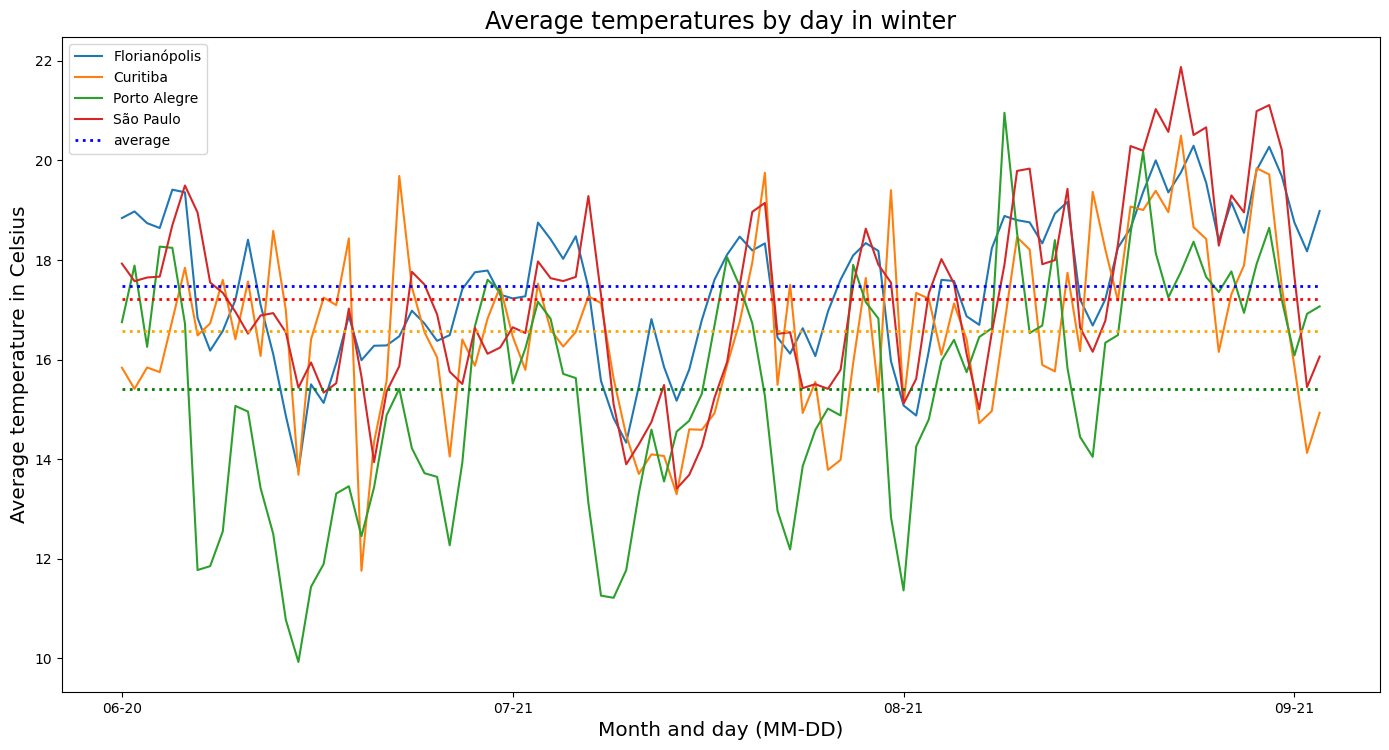

In [4]:
fig = plt.figure()
ax = plt.axes()

fig.set_size_inches(17, 8.5)

ax.xaxis.set_major_locator(ticker.MultipleLocator(31))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

labels = ax.get_xticklabels()

plt.plot(x1,y1, label='Florianópolis')
plt.plot(x2,y2, label='Curitiba')
plt.plot(x3,y3, label='Porto Alegre')
plt.plot(x4,y4, label='São Paulo')

ax.hlines(y=curitiba['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].mean(), xmin=0, xmax=95, linewidth=2, color='orange', linestyles='dotted')
ax.hlines(y=florianopolis['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].mean(), xmin=0, xmax=95, linewidth=2, color='blue', linestyles='dotted', label='average')
ax.hlines(y=saopaulo['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].mean(), xmin=0, xmax=95, linewidth=2, color='red', linestyles='dotted')
ax.hlines(y=portoalegre['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].mean(), xmin=0, xmax=95, linewidth=2, color='green', linestyles='dotted')

plt.ylabel('Average temperature in Celsius', fontsize='x-large')
plt.xlabel('Month and day (MM-DD)', fontsize='x-large')

plt.title('Average temperatures by day in winter', fontsize='xx-large')
plt.legend()
plt.show()
